In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [2]:
# Van der Pol oscillator
#http://kitchingroup.cheme.cmu.edu/blog/2013/02/02/Solving-a-second-order-ode/

mu = 1.
def f(t, y):
    # dx/dt = mu(x - 1/3*x**3 - y)
    # dy/dt = mu/x
    return [mu*(y[0] - (y[0]**3)/3. - y[1]), y[0]/mu]

t = np.linspace(0, 40, 500).reshape(-1, 1) #training points
y0_list = [1, 2] 

# Reference solution

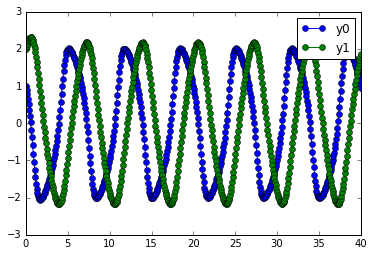

In [3]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='y0')
plt.plot(sol.t, sol.y[1], marker='o', label='y1')
plt.legend()

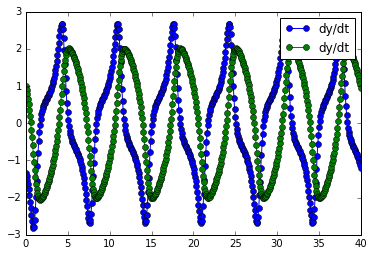

In [4]:
# reference solution using scipy package
plt.plot(sol.t, f(sol.t, sol.y)[0], marker='o', label='dy/dt')
plt.plot(sol.t, f(sol.t, sol.y)[1], marker='o', label='dy/dt')
plt.legend()

# Neural Net Training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=200)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [1, 2] 
Numnber of hidden units:   200 
Number of training points: 500 

In [6]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  16754205367.6


/Users/chinhuichew/.local/lib/python3.5/site-packages/autograd/numpy/numpy_vjps.py:53: RuntimeWarning: overflow encountered in square
  lambda ans, x, y : unbroadcast_f(y, lambda g: - g * x / y**2))


iteration: 100 loss:  0.0437249412915
iteration: 200 loss:  0.0419300680618
iteration: 300 loss:  0.0414891951993
iteration: 400 loss:  0.0413053342414
iteration: 500 loss:  0.0412523287632
iteration: 600 loss:  0.0412298097735
iteration: 700 loss:  0.0412174357472
iteration: 800 loss:  0.0411941738628
iteration: 900 loss:  0.0411843962346
         Current function value: 0.041179
         Iterations: 1000
         Function evaluations: 1089
         Gradient evaluations: 1089
CPU times: user 9min 57s, sys: 34.8 s, total: 10min 32s
Wall time: 4min 51s


# Verifying training set

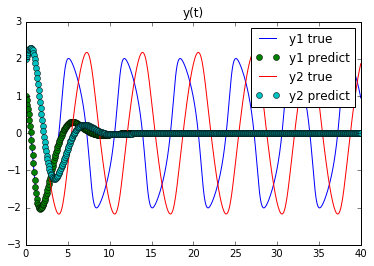

In [11]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
#plt.xlim((0, 3))
plt.title('y(t)')


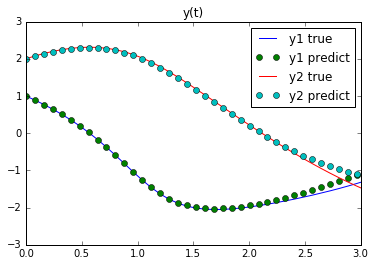

In [12]:
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.xlim((0, 3))
plt.title('y(t)')

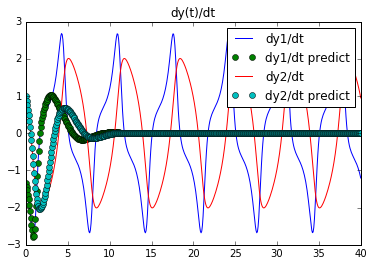

In [8]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')